In [4]:
import pandas as pd
def fetch_train(name):
    filename = "./../Dataset/" + name + ".csv"
    df = pd.read_csv(filename)
    return df

In [5]:
train_1 = fetch_train("train_1").fillna(0)
train_2 = fetch_train("train_2").fillna(0)

In [6]:
y = train_1.loc[1][1:]
ind = pd.to_datetime(y.index)
arr = []
for i in range(len(y)):
    arr.append(y[i])
arr = pd.DataFrame(arr)
arr.index = ind

In [7]:
import itertools
#ARIMA MODEL
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(arr,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

In [9]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(arr,
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [10]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1250      0.034      3.716      0.000       0.059       0.191
ar.S.L12      -0.0157      0.052     -0.301      0.763      -0.118       0.087
ma.S.L12      -1.0850      0.048    -22.743      0.000      -1.179      -0.992
sigma2      1015.7821     99.157     10.244      0.000     821.438    1210.126


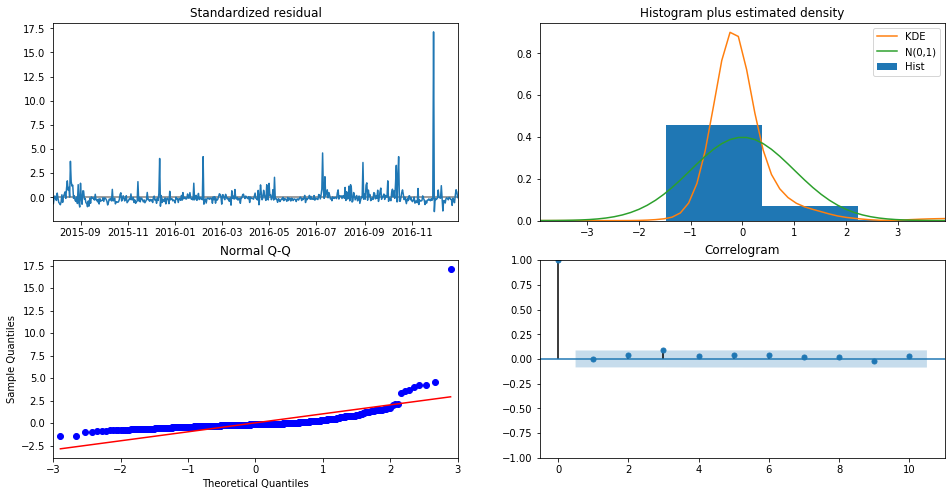

In [12]:
from matplotlib import pyplot as plt
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [34]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'),end=pd.to_datetime('2016-12-31') )
pred_ci = pred.conf_int()

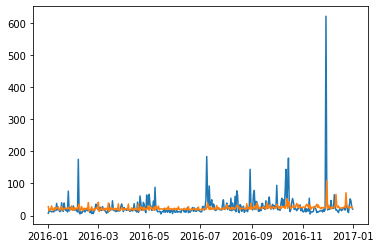

In [35]:
plt.plot(arr['2016-01-01':'2017-01-02'],label='observed')
plt.plot(pred.predicted_mean)
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(arr['2016-01-01':'2017-01-02'], pred.predicted_mean))
print(rmse)

38.43076137978699
